# Educational Attainment of Youth in Transition
-----------------------------------------------------------

## Introduction
--------------------

According to the National Data Archive on Child Abuse and Neglect (NDACAN),  each year, about 10% of children who exit foster care are discharged each year due to having reached the states age limit for eligibility. These children are at increased risk of unemployment, criminal conviction, substance abuse, lower educational attainment, homelessness, and poor mental health in adulthood (Child Abuse and Neglect, 2011).  A positive education experience has the potential to be a powerful counterweight to the abuse, neglect, separation, impermanence and other barriers these vulnerable children experience. 

Participation in and persistence to a post-secondary credential can enhance the foster youths well-being, help them make more successful transitions to adulthood, and increase their chances for personal fulfillment and economic self-sufficiency. National research shows that children in foster care are at high risk of dropping out of school and are unlikely to attend or graduate from college. My analysis is intended to help look into the NYTD services provided by the Chafee Act and educational outcomes to determine if they are good predictors of success for the foster youth. 

The John H. Chafee Foster Care Independence Act of 1999 provided states with flexible funding intended to serve youth at risk of exiting foster care without permanency, and required that states track the services received by youth as well as youth outcomes. The data system developed to meet this requirement is referred to as National Youth in Transition Database (NYTD). 

## Client
-----------
Analyzing the educational outcomes and the services utilized by the foster youth can play an invaluable role in helping to highlight and better assess child welfare services and programs.

## Dataset
-------------
 - National Youth in Transition Database (NYTD) Outcomes File, FY 2011- 2016
NYTD outcomes database collects information about current and former foster youth as the youth transition from foster care to independence. Foster youth who turned 17 years old in Federal Fiscal Year (FFY) 2011 participated in the first-ever NYTD survey, and were followed up when they reached 19  years of age (in FFY 2013).

- National Youth in Transition Database (NYTD) Service File, FY 2011- 2016
NYTD services database collects information on all youth who receive at least one independent living skills service paid for or provided by a Chafee funded county or agency, regardless of their foster care status and regardless of their age. This is the Services population.


- Adoption and Foster Care Analysis and Reporting System (AFCARS) Annual File, FY 2000 - Present
AFCARS collects case-level information on all children in foster care for whom State child welfare agencies have responsibility of placement, care, or supervision and on children who are adopted under the auspices of the State's public child welfare agency.

## Acknowlegements
---------------------------
Thank you to my mentor, Abhishek Sharma, for all your support and assistance on this project.


The data used for my project were made available by the National Data Archive on Child Abuse and Neglect (NDACAN), Cornell University, Ithaca, NY, and have been used with permission. Data from the NYTD and AFCARS were originally collected by the states and provided to the Children’s Bureau. Funding for the project was provided by the Children’s Bureau, Administration on Children, Youth and Families, Administration for Children and Families, U.S. Department of Health and Human Services. The collector of the original data, the funder, the Archive, Cornell University and their agents or employees bear no responsibility for the analyses or interpretations presented here.


# Data Collection and Wrangling
-----------------------------------------
Before performing exploratory analysis, we must clean the data first. Analysis performed with Python.

1) Import STATA files as a Pandas DataFrame

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import NYTD Services file as a Pandas DataFrame
nytd_services = pd.io.stata.read_stata('NYTD Services 2011-2016.dta')

display(nytd_services.head())

,fy,stfips,st,repdate,recnumbr,dob,sex,amiakn,asian,blkafram,...,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,stfcid,race,raceethn,agemp
0,2013,1,AL,201309,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",14
1,2014,1,AL,201409,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",15
2,2015,1,AL,201509,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",16
3,2011,1,AL,201109,000000014871,1996-08-15,Female,No,No,Yes,...,No,No,No,No,No,No,AL000000014871,Black Only,"NH, Black Only",14
4,2012,1,AL,201209,000000014871,1996-08-15,Female,No,No,Yes,...,No,No,No,No,No,No,AL000000014871,Black Only,"NH, Black Only",15


In [3]:
# import NYTD Outcomes file as a Pandas DataFrame
nytd_outcomes = pd.io.stata.read_stata('Cohort14W2.dta')

display(nytd_outcomes.head())

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


2) Check for missing values:

In [4]:
# nytd_services.info()

In [5]:
# nytd_outcomes.info()

No missing entries from the NYTD outcomes DataFrame. The NYTD services has 15 missing entries from the 'agemp' column. These missing values are dropped later on in this report.

In [6]:
# Number of unique child IDs that received services (RecNumbr = AFCARS Unique Child ID)
nytd_services['recnumbr'].nunique()

324463

In [7]:
# Foster Care Status - Services
fc = nytd_services.loc[nytd_services['fcstatsv'] == 'Yes, received services & was in FC']
fc['recnumbr'].nunique()

261588

- Number of youth in foster care receiving services (2011-2016): 261,588
- Number of youth no longer in foster care and receiving services (2011-2016): 62,875

In [8]:
# Number of unique child IDs that participated in the baseline survey at age 17 (RecNumbr = AFCARS Unique Child ID)
nytd_outcomes['recnumbr'].nunique()

23781

In [9]:
# Create filtered DataFrame for wave 1 - Age 17 Baseline Survey
wave_1 = nytd_outcomes.loc[nytd_outcomes['wave'] == 'Age 17 Baseline Survey']
display(wave_1.head())

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


In [10]:
# Create filtered DataFrame for wave 2 - Age 19 Followup
wave_2 = nytd_outcomes.loc[nytd_outcomes['wave'] == 'Age 19 Followup']
display(wave_2.head())

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23781,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23782,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23783,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23784,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,yes,do not know,not applicable,not applicable,yes,yes,yes,no,no,yes
23785,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes


69% of wave 1 (age 17 baseline) survey participants also completed the wave 2 (age 19 followup) survey.

In [11]:
# Foster Youth at 17 - Currently in Foster Care (22,545)
current_youth_17 = wave_1.loc[wave_1['outcmfcs'] == 'yes']
display(current_youth_17.head())

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


95% of the 17 year olds that filled out the wave 1 survey, said they are in foster care.

In [12]:
# Foster Youth at 19 - Currently in Foster Care (4,909)
current_youth = wave_2.loc[wave_2['outcmfcs'] == 'yes']
display(current_youth.head())

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23783,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23784,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,yes,do not know,not applicable,not applicable,yes,yes,yes,no,no,yes
23785,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23786,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23789,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


30% of the 19 year olds that filled out the wave 2 survey, said they are in foster care.

# Exploratory Data Analysis
------------------------------------

1) Compare gender from wave 1 and wave 2 surveys:

        wave 1  wave 2
sex                   
male     12233    8338
female   11548    8143


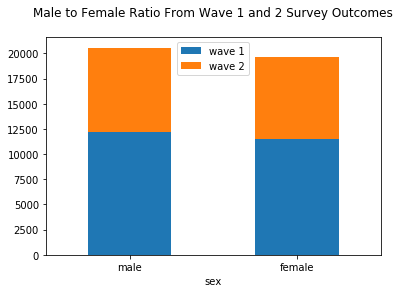

Ratio of male to female=  0.51:0.49 


In [13]:
# Number of female and males in the wave 1(Age 17 Baseline survey)
w1_gender = wave_1.groupby('sex').size()

# Number of female and males in the wave 2(Age 19 Followup survey)
w2_gender = wave_2.groupby('sex').size()

# Combine w1_gender and w2_gender
outcomes_gender = pd.concat([w1_gender, w2_gender], axis=1, keys=['wave 1','wave 2'])
print(outcomes_gender)

# Stacked bar plot showing the gender ratio from wave 1 and wave 2 survey outcomes
outcomes_gender.plot(kind='bar', stacked=True)
plt.legend(loc='upper center')
plt.xticks(rotation=0)
plt.title('Male to Female Ratio From Wave 1 and 2 Survey Outcomes\n')
plt.show()

print("Ratio of male to female=  0.51:0.49 ")

2) What is the education enrollment status of former youth?

#### Current Enrollment And Attendance (CurrEnroll)

“Yes” means the youth is enrolled in and attending high school, GED classes, or postsecondary vocational training or college, as of the date of the outcome data collection. A youth is still considered enrolled in and attending school if the youth would otherwise be enrolled in and attending a school that is currently out of session.

“Declined” means the youth did not answer this question.

In [14]:
# Former Youth at 19, OutcmFCS = Foster Care Status at Outcomes Collection
former_youth = wave_2.loc[wave_2['outcmfcs'] == 'no']
display(former_youth.head())

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23781,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23782,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23787,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23788,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23796,Age 19 Followup,AL000000219475,1,AL,000000219475,201603,1997-03-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


In [15]:
# Group former youth by current education enrollment (CurrEnroll) 
former_youth.groupby('currenroll').size()

currenroll
no          2886
yes         2313
declined     177
blank       6195
dtype: int64

- Former Foster Youth Enrolled and Attending School: 2,313
- Former Foster Youth Not Enrolled and Attending School: 2,886
- Unknown Education Status of Former Foster Youth (Either declined or left question blank): 6,372


#### 44% of former youth who answered this question said they are enrolled and attending school. More than half of former youth said they are not enrolled in school. 
#### ** This does not include the 6,372 that left this question blank.

2) Are the educational enrollment outcomes better for youth in foster care?

In [16]:
# Group current youth by current education enrollment (CurrEnroll) 
current_youth.groupby('currenroll').size()

currenroll
no          1152
yes         2345
declined      57
blank       1355
dtype: int64

#### Better educational enrollment outcomes from youth who are in foster care.

- Current Foster Youth Enrolled and Attending School: 2,345
- Current Foster Youth Not Enrolled and Attending School: 1,152
- Unknown Education Status of Current Foster Youth (Either declined or left question blank): 1,412

#### 67% of current youth who answered this question said they are enrolled and attending school. 33% are not enrolled in school
#### ** This does not include the 1,412 that left this question blank.

3) What is the highest level of education received by a majority of former foster youth?

#### Highest Educational Certification Received (HighEdCert):

A youth has received an education certificate if the youth has a high school diploma or general equivalency degree (GED), vocational certificate, vocational license, associate’s degree (e.g., A.A.), bachelor’s degree (e.g., B.A. or B.S.), or a higher degree as of the date of the outcome data collection. Indicate the highest degree that the youth has received.

In [17]:
# Group former foster youth by Highest Educational Certification Received (HighEdCert)
former_youth.groupby('highedcert').size().sort_values(ascending = False)

highedcert
blank                     6206
high school or ged        3013
none of the above         2072
declined                   155
vocational certificate      73
vocational license          36
associate degree             8
higher degree                6
bachelor degree              2
dtype: int64

In [18]:
# Group current foster youth by Highest Educational Certification Received (HighEdCert)
current_youth.groupby('highedcert').size().sort_values(ascending = False)

highedcert
high school or ged        2196
blank                     1357
none of the above         1212
declined                    62
vocational certificate      38
associate degree            21
vocational license           9
bachelor degree              8
higher degree                6
dtype: int64

- Highest level of education by most foster youth: High School or GED
- A high number of youth participants did not answer this question (blank or declined): 7,780
- 2.4% (207 out of 8,700) completed post-secondary vocational training or college.

4) Explore the relationship between educational outcomes and services (e.g., Post-secondary educational support)

In [19]:
# Merge NYTD outcomes to NYTD Services Dataset
df = pd.merge(nytd_outcomes, nytd_services, on='stfcid', how='left')
display(df.head())

,wave,stfcid,stfips_x,st_x,recnumbr_x,repdate_x,dob_x,sex_x,amiakn_x,asian_x,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
2,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",18
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
4,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",15


In [20]:
# Drop duplicate Child IDs
df = df.drop_duplicates(['stfcid'])
display(df.head())

,wave,stfcid,stfips_x,st_x,recnumbr_x,repdate_x,dob_x,sex_x,amiakn_x,asian_x,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13


In [21]:
# Drop duplicate columns (e.g: recnumbr_x and recnumber_y)

# define our drop function
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

drop_y(df)
df

# func to rename '_x' cols
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(df)

display(df.head())

,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13


#### The joined dataframe contains the services and survey outcomes.

In [22]:
# Replace all entries with 'declined','blank','Blank' to NaN
# Replace 'no','yes','unknown' with 'No', 'Yes','Unknown

df = df.replace('declined',np.nan).replace('no','No').replace('yes','Yes').replace('blank',np.nan).replace('Blank',np.nan).replace('unknown','Unknown')

df.reset_index()
df.dropna()

display(df.head())

,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,No,No,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,No,No,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,No,No,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,No,No,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13


5) Compare the race of foster youth:

race
White Only                7452
Black Only                4630
AmInd / AK Native Only     301
Asian Only                 154
>1 Race                    850
Race Missing              1565
dtype: int64


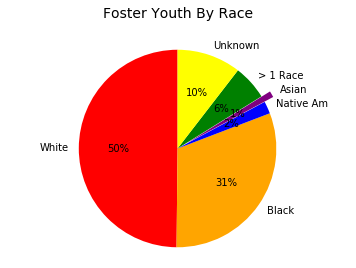

In [23]:
race_youth = df.groupby('race').size()
race_youth = race_youth.drop('Pac Islander Only')
print(race_youth)

# Plot foster youth by race
labels = ['White', 'Black','Native Am','Asian','> 1 Race','Unknown']
colors =['red','orange','blue', 'purple','green','yellow']

plt.pie(race_youth, labels=labels, colors=colors, startangle=90, autopct='%1.0f%%', explode = (0, 0, 0, 0.1, 0,0))
plt.axis('equal')
plt.title('Foster Youth By Race\n', fontsize=14)
plt.show()

6) Which services are utlilized the most?

- SpecEdSv: Special Education
- ILNAsv: Independent Living Needs Assessment
- AcSuppSv: Academic Support
- PSEdSuppSv: Post-Secondary Educational Support
- CareerSv: Career Preparation
- EmplyTrSv: Employment Programs Or Vocational
- BudgetSv: Budget And Financial Management
- HousEdSv: Housing Education And Home
- HlthEdSv: Health Education And Risk Prevention
- FamSuppSv: Family Support And Healthy Marriage
- MentorSv: Mentoring
- SILsv: Supervised Independent Living
- RmBrdFASv: Room And Board Financial Assistance
- EducFinASv: Education Financial Assistance
- OthrFinaSv: Other Financial Assistance

In [24]:
# Set up function to create education status column
def enrollment_status(row):
    if row == 'Yes':
        return 'Enrolled'
    elif row == 'No':
        return 'Not Enrolled'
    else: 
        return 'Neither'
    
# Apply function to 'currenroll column'
df['educstatus'] = df['currenroll'].apply(enrollment_status)

# print(df['educstatus'])

educstatus
Enrolled        16145
Neither          6528
Not Enrolled     1108
dtype: int64


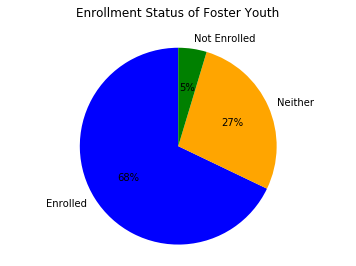

In [25]:
# Current Enrollment and Attendance
enrollment = df.groupby('educstatus').size()
print(enrollment)

labels = ['Enrolled', 'Neither','Not Enrolled']
colors =['blue','orange','green']

plt.pie(enrollment, labels=labels, colors=colors, startangle=90, autopct='%1.0f%%')
plt.axis('equal')
plt.title('Enrollment Status of Foster Youth\n', fontsize=12)
plt.show()

In [26]:
# List of NYTD services 
cols = ['specedsv', 'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv', 'emplytrsv', 'budgetsv', 'housedsv', 'hlthedsv', 'famsuppsv', 'mentorsv', 'silsv', 'rmbrdfasv', 'educfinasv', 'othrfinasv']

# Create list comprehension to count activity for each service and append to list of services
services = [ df.groupby(col).size() for col in cols ]

# Concatenate list of services into a dataframe
services_df = pd.concat(services, axis=1, keys=cols)

# Remove index name
services_df.index.name = None

# Drop 'Blank' from index
services_df = services_df.drop(services_df.index[2])

display(services_df.head())

,specedsv,ilnasv,acsuppsv,psedsuppsv,careersv,emplytrsv,budgetsv,housedsv,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv
No,10888,7241,7856,12435,10682,12480,10749,10477,10060,11145,12021,13464,13192,13044,11537
Yes,3401,7090,6475,1896,3649,1851,3582,3854,4271,3186,2310,868,1139,1286,2793


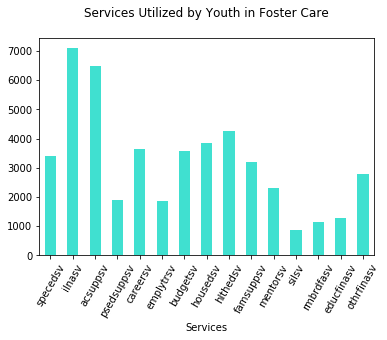

In [27]:
# Compare the services used by 14,989 foster youth
yes = services_df.iloc[1]

yes.plot(kind='bar', align='center', rot=60, color = 'turquoise')
plt.xlabel('Services')
plt.title('Services Utilized by Youth in Foster Care\n')
plt.show()

##### Top 3 services used by foster youth:
------------------------------------------
- Independent Living Needs Assessment
- Academic Support
- Health Education And Risk Prevention

acsuppsv      6475
psedsuppsv    1896
educfinasv    1286
Name: Yes, dtype: int64


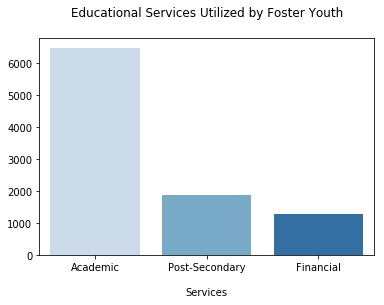

In [28]:
# Compare the educational services used by 14,989 foster youth
edu_servs = services_df.loc['Yes',['acsuppsv','psedsuppsv', 'educfinasv']]
print(edu_servs)

sns.barplot(x=['Academic','Post-Secondary','Financial'], y=[6475, 1896, 1286], palette="Blues")
plt.title('Educational Services Utilized by Foster Youth\n')
plt.xlabel('\nServices')
plt.show()

- 6,475 foster youth receive academic support such as counseling, studying for an exam, help with homework, etc...

- 64% of foster youth are receiving educational support (Academic, Post-secondary, and Financial)

*** Not including blank responses 

In [29]:
# Educational Outcomes from wave -1 (baseline) and wave-2 followup survey 
# Highest Educational Certification Received
print('\n',df.groupby('highedcert').size())

# Current Educational Level
print('\n',df.groupby('edlevlsv').size())


 highedcert
high school or ged          866
vocational certificate       62
vocational license            6
associate degree             10
bachelor degree               9
higher degree                24
none of the above         15812
declined                      0
blank                         0
dtype: int64

 edlevlsv
Less than 6th grade     329
6th grade               404
7th grade               971
8th grade              2432
9th grade              3671
10th grade             3464
11th grade             1769
12th grade              629
Post secondary           54
College                  69
Blank                     0
dtype: int64


# Statistical Analysis
-----------------------------

Use df2 with all 15 services and the education status from baseline (age 17) and follow-up (age 19) survey. 

Positive education = Enrolled

List of services:
- SpecEdSv: Special Education
- ILNAsv: Independent Living Needs Assessment
- AcSuppSv: Academic Support
- PSEdSuppSv: Post-Secondary Educational Support
- CareerSv: Career Preparation
- EmplyTrSv: Employment Programs Or Vocational
- BudgetSv: Budget And Financial Management
- HousEdSv: Housing Education And Home
- HlthEdSv: Health Education And Risk Prevention
- FamSuppSv: Family Support And Healthy Marriage
- MentorSv: Mentoring
- SILsv: Supervised Independent Living
- RmBrdFASv: Room And Board Financial Assistance
- EducFinASv: Education Financial Assistance
- OthrFinaSv: Other Financial Assistance

1) Using Chi-square Statistic to see if there is a correlation between the services provided by a Chafee funded country and a positive education outcome for a foster youth in transition?

In [30]:
# Create new dataframe with enrollment status and NYTD Services using groupby and unstack

df2 = pd.concat([df.groupby(['educstatus',e])[e].count().unstack() for e in cols],axis=1).fillna(0).astype(int)    
df2.columns=pd.MultiIndex.from_product([cols,['No','Yes']])

display(df2.head())

specedsv       ilnasv       acsuppsv       psedsuppsv        \
                   No   Yes     No   Yes       No   Yes         No   Yes   
educstatus                                                                 
Enrolled         7809  2464   5058  5245     5741  4562       8935  1368   
Neither          2578   793   1869  1510     1732  1647       2921   458   
Not Enrolled      501   144    314   335      383   266        579    70   

             careersv        ...  mentorsv       silsv      rmbrdfasv       \
                   No   Yes  ...        No   Yes    No  Yes        No  Yes   
educstatus                   ...                                             
Enrolled         7592  2711  ...      8565  1738  9707  597      9429  874   
Neither          2581   798  ...      2898   481  3143  236      3153  226   
Not Enrolled      509   140  ...       558    91   614   35       610   39   

             educfinasv      othrfinasv        
                     No  Yes         No   Yes  
educstatus                                     
Enrolled           9324  979       8178  2125  
Neither            3120  258       2870   508  
Not Enrolled        600   49        489   160  

[3 rows x 30 columns]

In [31]:
# Use chi-square test to determine the relationship of services and educational attainment of foster youth 
from scipy.stats import chisquare

chisquare(df2)

Power_divergenceResult(statistic=array([ 7814.488795  ,  2527.44545722,  4846.468996  ,  5562.61636107,
        5931.77774949,  4457.14316602,  8964.6880579 ,  1404.7721519 ,
        7449.18498409,  2933.01562072,  8909.65721154,  1462.56401945,
        7451.13647781,  2937.11725293,  7378.101174  ,  2995.71925272,
        7119.87574553,  3252.27862327,  8070.18734859,  2300.45762712,
        8460.40578987,  1924.13766234,  9816.14572193,   560.55990783,
        9371.57261977,  1011.49956102,  9272.32382705,  1110.74805599,
        8057.96532894,  2361.98281418]), pvalue=array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   9.06991150e-306,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000

#### All the services are statistically significant when compared to educational attainment.

Another interesting study to examine is the impact that post-secondary services have on foster youth attending college or post-secondary education. 

2) Is there a relationship between foster youth receiving post-secondary support (e.g. college prep) and college/post-secondary attainment?

Education Level: highest educational level completed by the youth. Post-secondary education or training refers to any other post-seondary education other than college. College refers to completing at least one semester of college.

Post-secondary education support: services designed to help a youth enter or complete a post-secondary education and include the following: Classes for test preparation, such as the Scholastic Aptitude Test (SAT);counseling about college; information about financial aid and scholarships; help completing college or loan applications; tutoring while in college.

In [32]:
# College or post-secondary education completed by the youth
educ_psedsupp = df.groupby(['edlevlsv','psedsuppsv']).size()

# Filter groupby with only 'College' and 'Post secondary' entries
college = educ_psedsupp[['College', 'Post secondary']]
print(college)

edlevlsv        psedsuppsv
Post secondary  No            40
                Yes           14
College         No            48
                Yes           21
dtype: int64


- Out of the 54 foster youth that completed a post-secondary education, 14 received post-secondary services.
- Out of the 69 foster youth that completed a college education, 21 received post-secondary services.

#### 28% of foster youth that completed a college or post-seondary education also received post-secondary services.

In [33]:
# Use chi-square test to determine the relationship of post-secondary services and college/post-secondary educational attainment of foster youth 

chisquare(college)

Power_divergenceResult(statistic=24.674796747967481, pvalue=1.8056780035994287e-05)

Based on the p-value (0.0000181) for the chi-square statistic, significant relationship between receivng post-secondary services and attainig a college degree.  Since a post-secondary education is an important indicator of success, the state care should educate these children on the post-secondary services and should be accessible to them.  

For foster youth not enrolled in school or highest level of education is below high school, do certain types of behavior (e.g. substance abuse, incarceration, and parenthood correlate with them. 

3) Is there a relationship between foster youths substance abuse and low level of education attainment?

In [34]:
col_names = ['subabuse', 'incarc','children']

# Create list comprehension to count activity for 'subabuse','incarc', & 'children' 
neg_outcomes = [ df.groupby(col).size() for col in col_names ]

# Concatenate list of neg outcomes into a dataframe
neg_outcomes = pd.concat(neg_outcomes, axis=1, keys=col_names)

# Remove index name
neg_outcomes.index.name = None

print(neg_outcomes)

# Current Educational Level
print('\n',df.groupby('edlevlsv').size())

     subabuse  incarc  children
No      12424   11417     16169
Yes      4710    5703       889

 edlevlsv
Less than 6th grade     329
6th grade               404
7th grade               971
8th grade              2432
9th grade              3671
10th grade             3464
11th grade             1769
12th grade              629
Post secondary           54
College                  69
Blank                     0
dtype: int64


In [35]:
# Create new dataframe with education level (K-12) and outcomes (substance abuse, incarceration, and children)
df3 = pd.concat([df.groupby(['edlevlsv',e])[e].count().unstack() for e in col_names],axis=1).fillna(0).astype(int)    
df3.columns=pd.MultiIndex.from_product([col_names,['No','Yes']])

df3 = df3.drop(df3.index[[1,2,4,5,7,8]])
display(df3)

subabuse      incarc      children    
                          No  Yes     No  Yes       No Yes
edlevlsv                                                  
Less than 6th grade      170   42    154   56      194  11
8th grade               1366  489   1261  594     1750  96
11th grade               936  360    874  423     1233  65
College                   43   10     39   14       45   1

In [36]:
chisquare(df3)

Power_divergenceResult(statistic=array([ 1895.02147117,   744.21642619,  1760.03092784,   882.07819687,
        2516.60955928,   140.59537572]), pvalue=array([  0.00000000e+000,   5.41786846e-161,   0.00000000e+000,
         6.82870529e-191,   0.00000000e+000,   2.81244681e-030]))

There is a negative correlation between the three negative outcomes (substance abuse, incarceration, and children) and three grade levels (less than 6th grade, 8th grade, and 11th grade)

4) Is there a correlation between Incarceration and Age?

In [37]:
# Create a DataFrame with number of incarcerations for each age (Out of 17120 foster youth)

#print(stress_df_vol)
incarc = df[df['incarc'] == 'Yes']
# print(incarc)

incarc_by_age = incarc.groupby('agemp').size().sort_values(ascending = False)
# print(incarc_by_age)

# Convert series to DataFrame
incarc_by_age_df = pd.DataFrame(data=incarc_by_age, columns=['incarc'])
# print(incarc_by_age_df)

# Reset index of incarc_by_age_df
incarc_by_age_df = incarc_by_age_df.reset_index()

# Drop index 7 and on
incarc_by_age_df = incarc_by_age_df.drop(incarc_by_age_df.index[7:24])

incarc_by_age_df['agemp'] = incarc_by_age_df['agemp'].astype('int')
print(incarc_by_age_df)

   agemp  incarc
0     16    1397
1     17     785
2     15     727
3     14     346
4     18     194
5     13      96
6     19      32


In [38]:
correlation = incarc_by_age_df.corr(method='pearson')
print(correlation)

           agemp    incarc
agemp   1.000000 -0.069072
incarc -0.069072  1.000000


There is a weak negative correlation between age and incarceration.

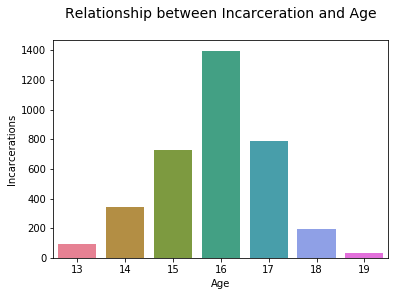

In [39]:
# Create scatter plot to show relationship between 'Incarceration' and 'Age'

sns.barplot(x='agemp',y='incarc', data=incarc_by_age_df, palette="husl")
plt.title('Relationship between Incarceration and Age\n', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Incarcerations')
plt.show()

#### Foster children at age 16 are more likely to be incarcerated.

5) Is there a correlation between the state of report submitted and educational outcomes of the youth?

In [40]:
# Educational Outcomes By State
# educ_state = df.groupby(['st', 'educstatus']).size()

educ_state_df = df.groupby(['educstatus','st'])['st'].size().unstack().fillna(0)

educ_state_df=educ_state_df.drop(educ_state_df.index[1])

display(educ_state_df)

st,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
educstatus,,,,,,,,,,,,,,,,,,,,,
Enrolled,51.0,229.0,153.0,81.0,2248.0,299.0,289.0,68.0,68.0,471.0,...,49.0,477.0,1041.0,203.0,336.0,46.0,333.0,356.0,330.0,59.0
Not Enrolled,5.0,8.0,15.0,6.0,176.0,10.0,9.0,11.0,1.0,20.0,...,4.0,47.0,69.0,19.0,11.0,0.0,37.0,19.0,16.0,7.0


In [41]:
chisquare(educ_state_df)

Power_divergenceResult(statistic=array([   37.78571429,   206.08016878,   113.35714286,    64.65517241,
        1771.11551155,   270.29449838,   263.08724832,    41.12658228,
          65.05797101,   414.2586558 ,   402.97535934,    25.3255814 ,
         355.01522843,    29.49122807,   410.94244604,   310.27802691,
         320.99481865,   370.89322382,   143.88489209,   494.69390788,
         300.05483029,    59.        ,   475.0449827 ,   192.17647059,
         382.27272727,    50.43820225,    47.29090909,   125.45398773,
          57.06557377,   177.95609756,    35.52631579,   190.125     ,
          26.06382979,   121.99310345,   451.76470588,   508.76470588,
         155.85943775,   219.59259259,   514.04787962,    95.91050584,
         124.69444444,   135.27835052,    38.20754717,   352.86259542,
         851.15675676,   152.5045045 ,   304.39481268,    46.        ,
         236.8       ,   302.85066667,   284.95953757,    40.96969697]), pvalue=array([  7.89578676e-010,   9.84236

#### All 52 states are statistically significant to the youth's educational attainment. The state the youth are in has an impact on their educational outcome.

# Machine Learning
-----------------

### I. Random Forest Classifier

1) The classification goal is to determine which services and outcomes are good predictors of educational attainment.

In [42]:
# Create DataFrame to use for model

# Make a copy of the combined data of NYTD outcomes and services
df4 = df.copy()

# Rename 'se' column with 'sex'
df4 = df4.rename(columns={'se': 'sex'})

# Column labels from df4
cols = df4.columns.values

# Create new column 'Enrolled' . This will be used for target variable
# Set up function to create 'Enrolled' column
def enrollment_status(row):
    if row == 'Yes':
        return 1
    elif row == 'No':
        return 0
    else: 
        return np.nan
    
# Apply function to 'currenroll' column
df4['enrolled'] = df4['currenroll'].apply(enrollment_status)

# Replace 'Yes, received services & was in FC' with 'Yes'  and 'No, received services, but was not in FC' with 'No' in fcstatsv column
df4['fcstatsv'] = df4['fcstatsv'].replace('Yes, received services & was in FC','Yes')
df4['fcstatsv'] = df4['fcstatsv'].replace('No, received services, but was not in FC','No')

# Loop through dataframe and replace rows with 'blank' and 'Blank' with NaNs
df4 = df4.replace('blank', np.nan).replace('Blank',np.nan).replace('unknown','Unknown')

# Drop NaN's from df4
df4 = df4.dropna()

In [43]:
# df4.info()

In [44]:
# Drop certain columns
cols_to_drop = ['wave','stfips','stfcid','recnumbr','repdate','dob','outcmdte','racedcln','lclfipssv','raceethn','raceunkn','prescripin','fy14cohort','fy','elig19','agemp','responded','samplestate','insample','currenroll', 'educstatus','highedcert','edlevlsv']

# Drop columns from list cols_to_drop
df4.drop(cols_to_drop, axis=1, inplace=True)

# Reset index
df4 = df4.reset_index(drop=True)

In [45]:
display(df4.head())

,st,sex,amiakn,asian,blkafram,hawaiipi,white,hisorgin,outcmrpt,outcmfcs,...,housedsv,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,enrolled
0,AL,male,No,No,Yes,No,No,No,incapacitated,Yes,...,No,No,No,No,No,No,Yes,No,Black Only,1.0
1,AL,male,No,No,Yes,No,No,No,participated,Yes,...,No,Yes,No,No,No,No,No,No,Black Only,1.0
2,AL,male,No,No,Yes,No,No,No,participated,Yes,...,No,No,No,No,No,No,No,Yes,Black Only,1.0
3,AL,male,No,No,Yes,No,No,No,participated,Yes,...,No,No,No,No,No,No,No,No,Black Only,1.0
4,AL,female,No,No,Yes,No,No,No,participated,Yes,...,No,Yes,No,Yes,No,No,No,No,Black Only,1.0


2) Creating Dummy Variables for Feature Selection

In [46]:
# Dummify all columns in DataFrame, df4
dummy_df = pd.get_dummies(df4, drop_first=True)
print(dummy_df.head())

   enrolled  st_AL  st_AR  st_AZ  st_CA  st_CO  st_CT  st_DE  st_FL  st_GA  \
0       1.0      1      0      0      0      0      0      0      0      0   
1       1.0      1      0      0      0      0      0      0      0      0   
2       1.0      1      0      0      0      0      0      0      0      0   
3       1.0      1      0      0      0      0      0      0      0      0   
4       1.0      1      0      0      0      0      0      0      0      0   

         ...          educfinasv_Yes  educfinasv_Blank  othrfinasv_Yes  \
0        ...                       1                 0               0   
1        ...                       0                 0               0   
2        ...                       0                 0               1   
3        ...                       0                 0               0   
4        ...                       0                 0               0   

   othrfinasv_Blank  race_Black Only  race_AmInd / AK Native Only  \
0                

In [47]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474 entries, 0 to 8473
Columns: 135 entries, enrolled to race_Race Missing
dtypes: float64(1), uint8(134)
memory usage: 1.1 MB


2) Select best features using Random Forest Classifier

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Y = Target variable, X = Features
Y = dummy_df['enrolled']
X = dummy_df.drop(['enrolled'],axis=1)

# Extract columns from dummy_df
feat_labels = X.columns.values

# Splitting the data from df4 into test and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=21)

forest = RandomForestClassifier(random_state=21, class_weight='balanced')

# Training random forest model
forest.fit(X_train, Y_train)

# Feature importance
importance = forest.feature_importances_

# Returns indices of sorted importance (greatest to least)
indices = np.argsort(importance)[::-1]

# Replace indices with feat_labels
best_feats = []
for f in range(10):
    print("%2d) %-*s %f" % (f + 1, 20, feat_labels[indices[f]], importance[indices[f]]))
    best_feats.append(feat_labels[indices[f]])
    

 1) sex_female           0.035805
 2) incarc_Yes           0.033934
 3) ilnasv_Yes           0.031684
 4) subabuse_Yes         0.031512
 5) acsuppsv_Yes         0.030779
 6) othrfinasv_Yes       0.027924
 7) specedsv_Yes         0.027549
 8) emplysklls_Yes       0.025689
 9) homeless_Yes         0.025038
10) famsuppsv_Yes        0.023874


In [49]:
# Top 10 features 
print("Best features:\n\n", best_feats)

Best features:

 ['sex_female', 'incarc_Yes', 'ilnasv_Yes', 'subabuse_Yes', 'acsuppsv_Yes', 'othrfinasv_Yes', 'specedsv_Yes', 'emplysklls_Yes', 'homeless_Yes', 'famsuppsv_Yes']


2) Logit model to test which features are significant

In [50]:
# logit model
import statsmodels.api as sm
from pandas.core import datetools

# Creating a summary table
logit_model_1 = sm.Logit(Y, X[best_feats])
result_1 = logit_model_1.fit()
result_1.summary()

/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.267417
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               enrolled   No. Observations:                 8474
Model:                          Logit   Df Residuals:                     8464
Method:                           MLE   Df Model:                            9
Date:                Mon, 26 Feb 2018   Pseudo R-squ.:                 -0.1962
Time:                        09:13:38   Log-Likelihood:                -2266.1
converged:                       True   LL-Null:                       -1894.5
                                        LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
sex_female         1.3201      0.078     16.957      0.000       1.168       1.473
incarc_Yes         0.5638      0.095      5.962      0.000       0.378       0.749
ilnasv_Yes         1.0136      0.073     13.888      0.000       0.871       1.157
subabuse_Yes       0.5120      0.103      4.950      0.000       0.309       0.715
acsuppsv_Yes       0.9843      0.082     12.024      0.000       0.824       1.145
othrfinasv_Yes     0.8368      0.103      8.111      0.000       0.635       1.039
specedsv_Yes       0.9681      0.104      9.321      0.000       0.765       1.172
emplysklls_Yes     1.1658      0.126      9.235      0.000       0.918       1.413
homeless_Yes       0.3505      0.119      2.944      0.003       0.117       0.584
famsuppsv_Yes      0.5915      0.118      5.021      0.000       0.361       0.822
==================================================================================
"""

#### The logit model shows all the features selected using random forest feature importnace are significant. 

In [51]:
# Use best features for Random Forest Classifier
X_1= X[best_feats]

# Splitting and train the data using the best features and target variable
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y, test_size = 0.25, random_state=21)

# Training random forest model
forest.fit(X_train_1, Y_train_1)

# Make prediction using best features
pred_enroll_1 = forest.predict(X_test_1)
print(pred_enroll_1)

[ 1.  0.  1. ...,  0.  0.  0.]


3) Logit model to test which states are significant

In [52]:
states = ['st_AL', 'st_AR', 'st_AZ', 'st_CA', 'st_CO', 'st_CT', 'st_DE',
       'st_FL', 'st_GA', 'st_IA', 'st_IL', 'st_KS', 'st_LA', 'st_MA',
       'st_MD', 'st_ME', 'st_MI', 'st_MN', 'st_MO', 'st_MT', 'st_ND',
       'st_NE', 'st_NH', 'st_NJ', 'st_NM', 'st_NV', 'st_NY', 'st_OH',
       'st_OK', 'st_PA', 'st_PR', 'st_RI', 'st_SC', 'st_SD', 'st_UT',
       'st_VA', 'st_VT', 'st_WA', 'st_WI', 'st_WV', 'st_WY']
logit_model_st = sm.Logit(Y, X[states])
results = logit_model_st.fit(method='bfgs')
results.summary()

         Current function value: 0.221796
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               enrolled   No. Observations:                 8474
Model:                          Logit   Df Residuals:                     8433
Method:                           MLE   Df Model:                           40
Date:                Mon, 26 Feb 2018   Pseudo R-squ.:                0.007907
Time:                        09:13:39   Log-Likelihood:                -1879.5
converged:                      False   LL-Null:                       -1894.5
                                        LLR p-value:                    0.8763
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
st_AL          3.5420      0.472      7.501      0.000       2.617       4.468
st_AR          2.4757      0.307      8.057      0.000       1.873       3.078
st_AZ          1.6972      0.437      3.883      0.000       0.841       2.554
st_CA          2.6030      0.093     27.895      0.000       2.420       2.786
st_CO          3.6350      0.476      7.632      0.000       2.701       4.569
st_CT          3.8201      0.483      7.906      0.000       2.873       4.767
st_DE          2.6593      0.510      5.219      0.000       1.661       3.658
st_FL          3.7335      0.415      9.003      0.000       2.921       4.546
st_GA          3.0087      0.222     13.527      0.000       2.573       3.445
st_IA          3.8367      0.364     10.537      0.000       3.123       4.550
st_IL          2.6316      0.419      6.282      0.000       1.811       3.453
st_KS          2.9151      0.366      7.963      0.000       2.198       3.633
st_LA          1.3765      0.160      8.626      0.000       1.064       1.689
st_MA          3.4555      0.375      9.221      0.000       2.721       4.190
st_MD          3.4342      0.337     10.192      0.000       2.774       4.095
st_ME          2.1283      0.519      4.098      0.000       1.110       3.146
st_MI          3.5810      0.454      7.886      0.000       2.691       4.471
st_MN          3.8303      0.552      6.942      0.000       2.749       4.912
st_MO          2.8362      0.224     12.647      0.000       2.397       3.276
st_MT          1.7118      0.499      3.430      0.001       0.734       2.690
st_ND          2.3170      0.522      4.442      0.000       1.295       3.339
st_NE          3.6783      0.478      7.693      0.000       2.741       4.615
st_NH          1.8627      0.437      4.262      0.000       1.006       2.719
st_NJ          2.2563      0.318      7.088      0.000       1.632       2.880
st_NM          1.4238      0.462      3.084      0.002       0.519       2.329
st_NV          3.4349      0.506      6.785      0.000       2.443       4.427
st_NY          2.9619      0.502      5.905      0.000       1.979       3.945
st_OH          3.2367      0.340      9.524      0.000       2.571       3.903
st_OK          2.1180      0.217      9.769      0.000       1.693       2.543
st_PA          2.1821      0.167     13.056      0.000       1.855       2.510
st_PR          2.3157      0.307      7.550      0.000       1.715       2.917
st_RI          3.0321      0.449      6.752      0.000       2.152       3.912
st_SC          2.8379      0.350      8.102      0.000       2.151       3.524
st_SD          2.0345      0.456      4.460      0.000       1.140       2.929
st_UT          2.6539      0.321      8.268      0.000       2.025       3.283
st_VA          3.7647      0.459      8.194      0.000       2.864       4.665
st_VT          1.4841      0.537      2.763      0.006       0.431       2.537
st_WA          2.5265      0.250     10.097      0.000       2.036       3.017
st

#### The logit model shows that all 52 states are statistically significant.

## Performance Evaluation Metrics on Predictions made using Random Forest Classifier

1) Confusion Matrix

[[  32   80]
 [ 484 1523]]


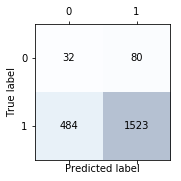

In [53]:
from sklearn.metrics import confusion_matrix

confmat_1 = confusion_matrix(y_true= Y_test_1, y_pred= pred_enroll_1)
print(confmat_1)

# Graph the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat_1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_1.shape[0]):
    for j in range(confmat_1.shape[1]):
        ax.text(x=j, y=i, s=confmat_1[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

1 = Enrolled in School

0 = Not Enrolled in School

1523 out of the 2007 sampled data made a correct prediction of a foster youth enrolling and attending school (Positive Educational Outcome). 32 out of the 112 sampled data made a correct prediction of a foster youth NOT enrolling and attending school (Negative Education Outcome).

2) ROC Curve

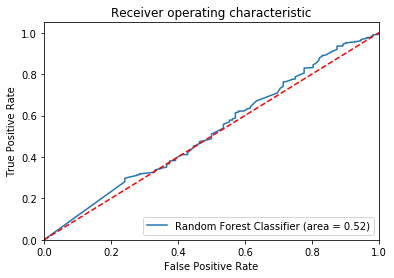

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_rf = roc_auc_score(Y_test_1, pred_enroll_1)
fpr_1, tpr_1, thresholds = roc_curve(Y_test_1, forest.predict_proba(X_test_1)[:,1])

plt.figure()
plt.plot(fpr_1, tpr_1, label='Random Forest Classifier (area = %0.2f)' % roc_auc_rf)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

3) Precision(PRE) and Recall(REC)

In [55]:
from sklearn.metrics import precision_score, recall_score

print('Precision: %.3f' % precision_score(y_true= Y_test_1, y_pred= pred_enroll_1))
print('Recall: %.3f' % recall_score(y_true= Y_test_1, y_pred= pred_enroll_1))

Precision: 0.950
Recall: 0.759


## II. Logistic Regression Classification

Classification tries to predict, which of a small set of classes, an observation belongs to. Mathematically, the aim is to find y (enrollment), a label based on knowing a feature vector x (e.g. substance abuse)

1) Feature Selection using Recursive Feature Elimination (RFE)

In [56]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=21, class_weight='balanced')

rfe = RFE(logreg, 10)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)

#  Get column names (features) 
col_names = X.columns.values

# Print best feature names
best_features_raw = rfe.support_ * col_names

# Create list with best feature names
best_feats_2 = []

for best_feature in best_features_raw:
    if len(best_feature) > 0:
        best_feats_2.append(best_feature)
        
print('Best Features: {}'.format(best_feats_2))

[False False False False False False False False False False False False
  True False False  True False  True False False  True False False False
 False  True False False False False False False False False False False
  True False False False  True False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[ 78  18  13  24   3   2  51  77  36  70  34  27   1  38  75   1  76   1
  35  74   1  52  11   5  20   1  53  41  19  23  49  39  25  47  21  79
   1  22  99  88   1  66  69  87  55 

2) Logit model to test which features are significant

In [57]:
# Creating a summary table
X_2 = X[best_feats_2]

logit_model_2 = sm.Logit(Y, X_2)
result = logit_model_2.fit(method='bfgs')
result.summary()

         Current function value: 0.235528
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               enrolled   No. Observations:                 8474
Model:                          Logit   Df Residuals:                     8464
Method:                           MLE   Df Model:                            9
Date:                Mon, 26 Feb 2018   Pseudo R-squ.:                -0.05352
Time:                        09:13:45   Log-Likelihood:                -1995.9
converged:                      False   LL-Null:                       -1894.5
                                        LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
st_LA            -1.0746      0.188     -5.717      0.000      -1.443      -0.706
st_ME             0.3461      0.783      0.442      0.659      -1.189       1.881
st_MN             0.9135      0.494      1.849      0.064      -0.055       1.882
st_ND             0.3885      0.745      0.522      0.602      -1.072       1.849
st_NV             0.6603      0.482      1.371      0.170      -0.284       1.604
st_VT             0.1743      1.015      0.172      0.864      -1.815       2.164
st_WY            -0.4346      0.542     -0.802      0.423      -1.497       0.628
hawaiipi_Yes      0.5692      0.606      0.939      0.348      -0.619       1.757
cnctadult_Yes     2.8981      0.053     54.708      0.000       2.794       3.002
children_Yes     -0.4931      0.173     -2.858      0.004      -0.831      -0.155
=================================================================================
"""

#### The logit model shows that 40% of the features selected using RFE are significant. 

3) Training logistic regression model using the best features selected

In [58]:
# Splitting and train the data using the best features and target variable
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y, test_size = 0.25, random_state=21)

# Training random forest model
logreg.fit(X_train_2, Y_train_2)

# Make prediction using best features
pred_enroll_2 = logreg.predict(X_test_2)
print(pred_enroll_2)

[ 1.  1.  1. ...,  0.  1.  1.]


### Performance Evaluation Metrics on Predictions made using Random Forest Classifier

1) Confusion Matrix

[[  36   76]
 [ 241 1766]]


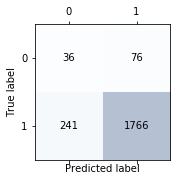

In [59]:
confmat_2 = confusion_matrix(y_true= Y_test_2, y_pred= pred_enroll_2)
print(confmat_2)

# Graph the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat_2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_2.shape[0]):
    for j in range(confmat_2.shape[1]):
        ax.text(x=j, y=i, s=confmat_2[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

1 = Enrolled in School

0 = Not Enrolled in School

1766 out of the 2007 sampled data made a correct prediction of a foster youth enrolling and attending school (Positive Educational Outcome). 36 out of the 112 sampled data made a correct prediction of a foster youth NOT enrolling and attending school (Negative Education Outcome). 

2) Precision(PRE) and Recall(REC)

In [60]:
print('Precision: %.3f' % precision_score(y_true= Y_test_2, y_pred= pred_enroll_2))
print('Recall: %.3f' % recall_score(y_true= Y_test_2, y_pred= pred_enroll_2))

Precision: 0.959
Recall: 0.880


The logistic regression model predicts the youth in transition will have a positive educational outcome ('Enrolled') 96% correctly. The probability of making the correct prediction is 88%.

3) K-Fold Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(logreg, X_test_2, Y_test_2, cv=10))

# Testing CV accuracy on the model
print("CV Accuracy of Logistic Regression on test set: {: .2f}" .format(cross_val_score(logreg, X_test_2, Y_test_2, cv = 5).mean()*100))
print("CV Accuracy of Logistic Regression on training set: {: .2f}" .format(cross_val_score(logreg, X_train_2, Y_train_2, cv = 5).mean()*100))

[ 0.85915493  0.82629108  0.84433962  0.86320755  0.86320755  0.85377358
  0.81603774  0.81990521  0.8056872   0.83886256]
CV Accuracy of Logistic Regression on test set:  84.19
CV Accuracy of Logistic Regression on training set:  84.63


The average testing accuracy of 84% is an estimate of the out-of-sample accuracy.

## III. Adaptive Boosting Classifier

1) Tuning hyperparameters via grid search

In [62]:
# #  Using GridSearchCV for optimizing hyperparameters of AdaBoost Classifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.grid_search import GridSearchCV

# # Setup the hyperparameter grid
# param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
#               "base_estimator__splitter" :   ["best", "random"],
#               "n_estimators": [50, 100, 200, 300, 400, 500]
#              }

# tree = DecisionTreeClassifier(random_state = 21, max_features = "auto", class_weight = 'balanced')

# ada = AdaBoostClassifier(base_estimator = tree)

# # Instantiate the GridSearchCV object: ada_cv
# ada_cv = GridSearchCV(ada, param_grid=param_grid, scoring = 'roc_auc')

# # Fit it to the trained data
# ada_cv.fit(X_train,Y_train)

# # Print the tuned parameters and score
# print("Tuned AdaBoost Classifier Parameters: {}".format(ada_cv.best_params_))
# print("Best score is {}".format(ada_cv.best_score_))

2) Applying Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', max_features = "auto", class_weight = 'balanced', random_state = 21)

ada = AdaBoostClassifier(base_estimator= tree, n_estimators=400, learning_rate=0.1, random_state=21)

# Fit model to trained data
tree = tree.fit(X_train, Y_train)

# Predict Y, "Enrolled"
Y_train_pred = tree.predict(X_train)
Y_test_pred = tree.predict(X_test)

# Prediction accuracy
tree_train = accuracy_score(Y_train, Y_train_pred)
tree_test = accuracy_score(Y_test, Y_test_pred)
print("Decision tree train/test accuracies %.3f/%.3f: " % (tree_train, tree_test)) 


Decision tree train/test accuracies 0.991/0.892: 


The decision tree seems to underfit the training data.

3) Applying AdaBoost 

In [64]:
ada = AdaBoostClassifier(base_estimator= tree, n_estimators=400, learning_rate=0.1,random_state=21)

# Fit model to trained data
ada = ada.fit(X_train, Y_train)

# Predict Y, "Enrolled"
Y_train_pred = ada.predict(X_train)
Y_test_pred = ada.predict(X_test)

# Prediction accuracy
ada_train = accuracy_score(Y_train, Y_train_pred)
ada_test = accuracy_score(Y_test, Y_test_pred)
print("AdaBoost train/test accuracies %.3f/%.3f: " % (ada_train, ada_test)) 


AdaBoost train/test accuracies 0.991/0.942: 


The AdaBoost model shows a slight improvement on the test set performance compared to the decision tree classifier.

4) Using AdaBoost to train data using best selected features

In [65]:
# Training AdaBoost model
ada.fit(X_train_1, Y_train_1)

# Make prediction using best features
pred_enroll_3 = ada.predict(X_test_1)
print(pred_enroll_3)

[ 1.  0.  1. ...,  0.  0.  0.]


## Performance Evaluation Metrics on Predictions made using AdaBoost Classifier

1) Confusion Matrix

[[  46   66]
 [ 749 1258]]


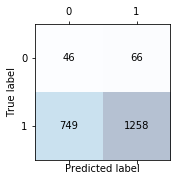

In [66]:
confmat_3 = confusion_matrix(y_true= Y_test_1, y_pred= pred_enroll_3)
print(confmat_3)

# Graph the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat_3, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_3.shape[0]):
    for j in range(confmat_3.shape[1]):
        ax.text(x=j, y=i, s=confmat_3[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

1 = Enrolled in School

0 = Not Enrolled in School

1258 out of the 2007 sampled data made a correct prediction of a foster youth enrolling and attending school (Positive Educational Outcome). 46 out of the 112 sampled data made a correct prediction of a foster youth NOT enrolling and attending school (Negative Education Outcome). 

2) ROC Curve

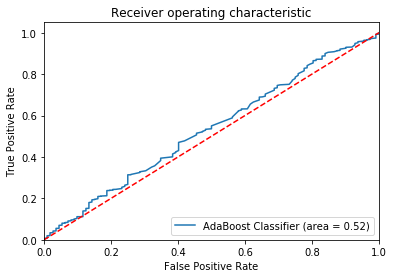

In [67]:
roc_auc_ada = roc_auc_score(Y_test_1, pred_enroll_3)
fpr_3, tpr_3, thresholds = roc_curve(Y_test_1, ada.predict_proba(X_test_1)[:,1])

plt.figure()
plt.plot(fpr_3, tpr_3, label='AdaBoost Classifier (area = %0.2f)' % roc_auc_ada)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [68]:
from sklearn.metrics import precision_score, recall_score

print('Precision: %.3f' % precision_score(y_true= Y_test_1, y_pred= pred_enroll_3))
print('Recall: %.3f' % recall_score(y_true= Y_test_1, y_pred= pred_enroll_3))

Precision: 0.950
Recall: 0.627


Probability of making the correct prediction using Adaboost is low: 63%

## Conclusion:
-----------------
Logistic Regression Classication model performed better in making correct predictions that a youth in transition will have a positive educational outcome.

## Summary of Findings:
-----------------------------

- The highest level of education by most youth in transition is High School or GED.

- Only 2.4% of foster youth complete post-secondary vocational training or college.

- Foster youth who were still in care at age 19 had better educational outcomes than their peers who had left.

- Foster children at age 16 are more likely to be incarcerated. Using Pearson's correlation coefficient, there is a weak association between age and incarceration.

- There is a good indication that a youth in transition will enroll in college or post-secondary school if they are receiving post-secondary support from the state.

- All services provided by Chafee Act (e.g. Academic Support) have a positive impact on the foster youth's educational attainment.

-  The State in which the youth lives has an impact on the youth’s educational attainment. The states with the most significance to a positive educational outcome when compared to all other features are Los Angeles, Minnesota, Nevada,  Wyoming, North Dakota, Maine, and Vermont. 


## Recommendation:
------------------------------
Post-secondary education is an important indicator of the foster youth's success. The state should educate these children on the academic services, such as post-secondary support, and should be made accessible to them. The more children that are informed about these services, more will utilize them, and therefore will lead to better educational outcomes.